In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import joblib

In [5]:
# Loading data
df = pd.read_excel("churn_dataset.xlsx")

# Displaying first 5 rows
df.head()

,Age,Tenure,Sex,Churn
0,56,8,Male,No
1,46,63,Female,No
2,32,11,Female,No
3,60,8,Male,No
4,25,35,Male,No


In [6]:
# Initializing the encoder
encoder = LabelEncoder()

# Encoding categorical features
df['Sex Categories'] = encoder.fit_transform(df['Sex'])
df['Churn Categories'] = encoder.fit_transform(df['Churn'])

# Displaying first 10 rows
df.head(10)

,Age,Tenure,Sex,Churn,Sex Categories,Churn Categories
0,56,8,Male,No,1,0
1,46,63,Female,No,0,0
2,32,11,Female,No,0,0
3,60,8,Male,No,1,0
4,25,35,Male,No,1,0
5,38,35,Female,Yes,0,1
6,56,33,Male,Yes,1,1
7,36,5,Female,No,0,0
8,40,41,Female,No,0,0
9,28,28,Male,No,1,0


In [7]:
# Checking for null values
df.isnull().sum()

,0
Age,0
Tenure,0
Sex,0
Churn,0
Sex Categories,0
Churn Categories,0


In [8]:
# Droping categorical columns
df = df.drop(['Sex', 'Churn'], axis = 1)

In [9]:
# Inspecting correlation between numerical features
df.select_dtypes(int).corr()

,Age,Tenure,Sex Categories,Churn Categories
Age,1.000000,0.017414,-0.000692,0.059723
Tenure,0.017414,1.000000,-0.127916,0.106367
Sex Categories,-0.000692,-0.127916,1.000000,-0.023168
Churn Categories,0.059723,0.106367,-0.023168,1.000000


In [11]:
# Defining features
features = df.drop(['Churn Categories'], axis = 1)

# Defining target
target = df['Churn Categories']

# Displaying first 5 rows of the target
target.head()

,Churn Categories
0,0
1,0
2,0
3,0
4,0


In [12]:
# Splitting data to train set and test set (70 % train, 30 % test)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [13]:
# Initializing the Gaussian Naive Bayes model
model = GaussianNB()

# Fitting data to model
model.fit(x_train, y_train)

GaussianNB()

In [14]:
# Predicting the target of test set
y_pred = model.predict(x_test)

In [15]:
# Displaying model accurecy
print(f"Accurecy: {accuracy_score(y_test, y_pred)}")

Accurecy: 0.8


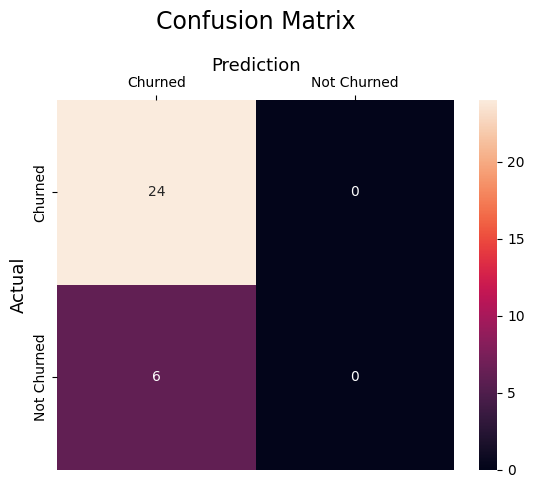

In [20]:
# Initializing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying confusion matrix
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Churned','Not Churned'],
            yticklabels=['Churned','Not Churned'])

# Defining title and axis labels
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

This confusion matrix shows that the model correctly predicted 24 cases of churn but incorrectly classified 6 non-churned cases as churned.

In [21]:
# Saving model
joblib.dump(model, "Gaussian Naive Bayes")

['Gaussian Naive Bayes']